# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Irfan Abidin
- **Email:** muhammadirfanabidin@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan apakah ada perbedaan signifikan antar musim?
- Seberapa besar pengaruh kondisi cuaca (weathersit, temperature, humidity, windspeed) terhadap jumlah penyewaan sepeda?
- Bagaimana perbedaan perilaku penyewaan antara pengguna casual dan registered, terutama pada hari kerja vs akhir pekan?
- Pada jam berapa saja terjadi peak hours penyewaan sepeda dan bagaimana pola tersebut berbeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme(style="whitegrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('dataset/day.csv')
day_df.shape

(731, 16)

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('dataset/hour.csv')
hour_df.shape

(17379, 17)

In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari data harian (731 records) dan jam-an (17,379 records)
- Data sudah cukup lengkap dengan berbagai variabel cuaca dan kategorikal

### Assessing Data

#### Info Dataset

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Cek Missing Values & Duplikasi

In [9]:
# Missing values
print("missing values in day_df:", day_df.isnull().sum().sum())
print("missing values in hour_df:", hour_df.isnull().sum().sum())

missing values in day_df: 0
missing values in hour_df: 0


In [10]:
# Checking duplicates
print("duplicates in day_df:", day_df.duplicated().sum())
print("duplicates in hour_df:", hour_df.duplicated().sum())

duplicates in day_df: 0
duplicates in hour_df: 0


#### Deskripsi statistik

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing values dan duplikasi pada kedua dataset
- Semua nilai numerik berada dalam range yang wajar
- Variabel numerik (temp, atemp, hum, windspeed) sudah dalam bentuk normalized (0-1)
- Rata-rata penyewaan harian: ~4,504 sepeda, dengan variasi yang cukup besar (std: 1,937)

### Cleaning Data

In [13]:
# Rename columns untuk readability
day_df = day_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_count'
})

hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'weekday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_count'
})


In [14]:
# Convert date to datetime
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

# Convert categorical columns
cat_cols_day = ['season','year','month','is_holiday','weekday','is_workingday','weather_situation']
cat_cols_hour = ['season','year','month','hour','is_holiday','weekday','is_workingday','weather_situation']

day_df[cat_cols_day] = day_df[cat_cols_day].astype('category')
hour_df[cat_cols_hour] = hour_df[cat_cols_hour].astype('category')


In [15]:
# Mapping
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_mapping = {0: '2011', 1: '2012'}
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Severe Weather'
}
holiday_mapping = {0: 'No Holiday', 1: 'Holiday'}
workingday_mapping = {0: 'No', 1: 'Yes'}

In [16]:
day_df['season'] = day_df['season'].map(season_mapping)
day_df['year'] = day_df['year'].map(yr_mapping)
day_df['month'] = day_df['month'].map(mnth_mapping)
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)
day_df['weather_situation'] = day_df['weather_situation'].map(weathersit_mapping)
day_df['is_holiday'] = day_df['is_holiday'].map(holiday_mapping)
day_df['is_workingday'] = day_df['is_workingday'].map(workingday_mapping)
day_df.shape

(731, 16)

In [17]:
day_df.head()

,instant,date,season,year,month,is_holiday,weekday,is_workingday,weather_situation,temperature,feels_temperature,humidity,wind_speed,casual_users,registered_users,total_count
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Saturday,No,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Sunday,No,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Monday,Yes,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Tuesday,Yes,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Wednesday,Yes,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['year'] = hour_df['year'].map(yr_mapping)
hour_df['month'] = hour_df['month'].map(mnth_mapping)
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weathersit_mapping)
hour_df['is_holiday'] = hour_df['is_holiday'].map(holiday_mapping)
hour_df['is_workingday'] = hour_df['is_workingday'].map(workingday_mapping)
hour_df.shape

(17379, 17)

In [19]:
hour_df.head()

,instant,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_situation,temperature,feels_temperature,humidity,wind_speed,casual_users,registered_users,total_count
0,1,2011-01-01,Spring,2011,Jan,0,No Holiday,Saturday,No,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No Holiday,Saturday,No,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No Holiday,Saturday,No,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No Holiday,Saturday,No,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No Holiday,Saturday,No,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data sudah bersih tanpa missing values atau duplikasi
- Kolom sudah direnamed untuk readability yang lebih baik
- Categorical variables sudah di-encode dengan labels yang meaningful
- Data siap untuk analisis exploratory

## Exploratory Data Analysis (EDA)

### Analisis Pola Penggunaan Berdasarkan Musim

In [20]:
# Analisis distribusi penyewaan per musim
seasonal_analysis = day_df.groupby('season').agg({
    'total_count': ['mean', 'median', 'std', 'min', 'max'],
    'casual_users': ['mean', 'median'],
    'registered_users': ['mean', 'median']
}).round(2)

print("=== ANALISIS PENYEWAAN BERDASARKAN MUSIM ===")
print(seasonal_analysis)

=== ANALISIS PENYEWAAN BERDASARKAN MUSIM ===
       total_count                              casual_users          \
              mean  median      std   min   max         mean  median   
season                                                                 
Spring     2604.13  2209.0  1399.94   431  7836       334.93   218.0   
Summer     4992.33  4941.5  1695.98   795  8362      1106.10   867.0   
Fall       5644.30  5353.5  1459.80  1115  8714      1202.61  1050.5   
Winter     4728.16  4634.5  1699.62    22  8555       729.11   544.5   

       registered_users          
                   mean  median  
season                           
Spring          2269.20  1867.0  
Summer          3886.23  3844.0  
Fall            4441.69  4110.5  
Winter          3999.05  3815.0  


In [21]:
# Statistik per musim
for season in day_df['season'].unique():
    season_data = day_df[day_df['season'] == season]
    print(f"MUSIM {season.upper()}:")
    print(f"  - Jumlah hari: {len(season_data)}")
    print(f"  - Rata-rata penyewaan harian: {season_data['total_count'].mean():.0f}")
    print(f"  - Range: {season_data['total_count'].min()} - {season_data['total_count'].max()}")
    print(f"  - Standar deviasi: {season_data['total_count'].std():.0f}")

MUSIM SPRING:
  - Jumlah hari: 181
  - Rata-rata penyewaan harian: 2604
  - Range: 431 - 7836
  - Standar deviasi: 1400
MUSIM SUMMER:
  - Jumlah hari: 184
  - Rata-rata penyewaan harian: 4992
  - Range: 795 - 8362
  - Standar deviasi: 1696
MUSIM FALL:
  - Jumlah hari: 188
  - Rata-rata penyewaan harian: 5644
  - Range: 1115 - 8714
  - Standar deviasi: 1460
MUSIM WINTER:
  - Jumlah hari: 178
  - Rata-rata penyewaan harian: 4728
  - Range: 22 - 8555
  - Standar deviasi: 1700


### Analisis Pengaruh Kondisi Cuaca

In [22]:
# Analisis berdasarkan weather situation
weather_analysis = day_df.groupby('weather_situation').agg({
    'total_count': ['count', 'mean', 'std'],
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean'
}).round(2)

print("Statistik berdasarkan kondisi cuaca:")
print(weather_analysis)

Statistik berdasarkan kondisi cuaca:
                      total_count                   temperature humidity  \
                            count     mean      std        mean     mean   
weather_situation                                                          
Clear/Partly Cloudy           463  4876.79  1879.48        0.51     0.57   
Mist/Cloudy                   247  4035.86  1809.11        0.47     0.73   
Light Snow/Light Rain          21  1803.29  1240.28        0.43     0.85   

                      wind_speed  
                            mean  
weather_situation                 
Clear/Partly Cloudy         0.19  
Mist/Cloudy                 0.19  
Light Snow/Light Rain       0.24  


In [23]:
# Korelasi antara variabel cuaca dengan penyewaan
weather_corr = day_df[['temperature', 'feels_temperature', 'humidity', 'wind_speed', 'total_count']].corr()['total_count'].sort_values(ascending=False)
print("Korelasi variabel cuaca dengan total penyewaan:")
for var, corr in weather_corr.items():
    if var != 'total_count':
        print(f"  - {var}: {corr:.3f}")

Korelasi variabel cuaca dengan total penyewaan:
  - feels_temperature: 0.631
  - temperature: 0.627
  - humidity: -0.101
  - wind_speed: -0.235


In [24]:
# Analisis suhu optimal
temp_ranges = pd.cut(day_df['temperature'], bins=5, labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'])
temp_analysis = day_df.groupby(temp_ranges)['total_count'].agg(['count', 'mean', 'std']).round(2)
print("Penyewaan berdasarkan range suhu:")
print(temp_analysis)

Penyewaan berdasarkan range suhu:
               count     mean      std
temperature                           
Sangat Dingin     43  1571.16   639.78
Dingin           194  3152.02  1391.39
Sedang           173  4585.80  1713.28
Hangat           194  5674.96  1561.20
Panas            127  5664.12  1293.64


### Analisis Perbedaan Casual vs Registered Users

In [25]:
# Perbandingan pada hari kerja vs akhir pekan
workday_analysis = day_df.groupby('is_workingday').agg({
    'registered_users': ['mean', 'median', 'std'],
    'registered_users': ['mean', 'median', 'std'],
    'total_count': ['mean', 'median']
}).round(2)

print("Perbandingan hari kerja vs akhir pekan:")
print(workday_analysis)

Perbandingan hari kerja vs akhir pekan:
              registered_users                  total_count        
                          mean  median      std        mean  median
is_workingday                                                      
No                     2959.03  2928.0  1293.87     4330.17  4459.0
Yes                    3978.25  3866.0  1568.69     4584.82  4582.0


In [26]:
# Rasio casual vs registered
day_df['casual_ratio'] = day_df['casual_users'] / day_df['total_count'] * 100
day_df['registered_ratio'] = day_df['registered_users'] / day_df['total_count'] * 100

ratio_analysis = day_df.groupby('is_workingday')[['casual_ratio', 'registered_ratio']].mean().round(2)
print("Persentase rata-rata casual vs registered users:")
print(ratio_analysis)

Persentase rata-rata casual vs registered users:
               casual_ratio  registered_ratio
is_workingday                                
No                    29.05             70.95
Yes                   12.25             87.75


In [27]:
# Analisis berdasarkan hari dalam minggu
weekday_analysis = day_df.groupby('weekday').agg({
    'casual_users': 'mean',
    'registered_users': 'mean',
    'total_count': 'mean'
}).round(0)

print("Rata-rata penyewaan per hari dalam minggu:")
print(weekday_analysis)

Rata-rata penyewaan per hari dalam minggu:
           casual_users  registered_users  total_count
weekday                                               
Sunday           1338.0            2891.0       4229.0
Monday            674.0            3664.0       4338.0
Tuesday           556.0            3954.0       4511.0
Wednesday         551.0            3997.0       4549.0
Thursday          591.0            4076.0       4667.0
Friday            752.0            3938.0       4690.0
Saturday         1465.0            3085.0       4551.0


### Analisis Peak Hours (menggunakan data per jam)

In [28]:
# Peak hours pada hari kerja
workday_hourly = hour_df[hour_df['is_workingday'] == 'Yes'].groupby('hour')['total_count'].mean()
weekend_hourly = hour_df[hour_df['is_workingday'] == 'No'].groupby('hour')['total_count'].mean()

print("Peak hours hari kerja (5 jam tertinggi):")
workday_peaks = workday_hourly.nlargest(5)
for hour, count in workday_peaks.items():
    print(f"  - Jam {hour}: {count:.0f} penyewaan rata-rata")

Peak hours hari kerja (5 jam tertinggi):
  - Jam 17: 525 penyewaan rata-rata
  - Jam 18: 492 penyewaan rata-rata
  - Jam 8: 477 penyewaan rata-rata
  - Jam 19: 348 penyewaan rata-rata
  - Jam 16: 293 penyewaan rata-rata


In [29]:
print("Peak hours akhir pekan (5 jam tertinggi):")
weekend_peaks = weekend_hourly.nlargest(5)
for hour, count in weekend_peaks.items():
    print(f"  - Jam {hour}: {count:.0f} penyewaan rata-rata")

Peak hours akhir pekan (5 jam tertinggi):
  - Jam 13: 373 penyewaan rata-rata
  - Jam 12: 366 penyewaan rata-rata
  - Jam 14: 365 penyewaan rata-rata
  - Jam 15: 359 penyewaan rata-rata
  - Jam 16: 353 penyewaan rata-rata


In [30]:
# Pola penyewaan berdasarkan periode waktu
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 21:
        return 'Sore'
    else:
        return 'Malam'

hour_df['time_period'] = hour_df['hour'].apply(categorize_time)

time_period_analysis = hour_df.groupby(['is_workingday', 'time_period'])['total_count'].mean().round(0)
print("Rata-rata penyewaan berdasarkan periode waktu:")
print(time_period_analysis)

Rata-rata penyewaan berdasarkan periode waktu:
is_workingday  time_period
No             Malam           74.0
               Pagi           132.0
               Siang          363.0
               Sore           253.0
Yes            Malam           62.0
               Pagi           204.0
               Siang          215.0
               Sore           404.0
Name: total_count, dtype: float64


### Analisis Pola Pengguna Casual vs Registered per Jam

In [31]:
casual_hourly_workday = hour_df[hour_df['is_workingday'] == 'Yes'].groupby('hour')['casual_users'].mean()
registered_hourly_workday = hour_df[hour_df['is_workingday'] == 'Yes'].groupby('hour')['registered_users'].mean()

casual_hourly_weekend = hour_df[hour_df['is_workingday'] == 'No'].groupby('hour')['casual_users'].mean()
registered_hourly_weekend = hour_df[hour_df['is_workingday'] == 'No'].groupby('hour')['registered_users'].mean()

print("Peak hours untuk casual users:")
print("Hari kerja (3 jam tertinggi):")
for hour, count in casual_hourly_workday.nlargest(3).items():
    print(f"  - Jam {hour}: {count:.1f}")
print("Akhir pekan (3 jam tertinggi):")
for hour, count in casual_hourly_weekend.nlargest(3).items():
    print(f"  - Jam {hour}: {count:.1f}")

Peak hours untuk casual users:
Hari kerja (3 jam tertinggi):
  - Jam 17: 56.9
  - Jam 18: 50.5
  - Jam 16: 48.3
Akhir pekan (3 jam tertinggi):
  - Jam 14: 139.6
  - Jam 15: 136.5
  - Jam 13: 136.4


In [32]:
print("Peak hours untuk registered users:")
print("Hari kerja (3 jam tertinggi):")
for hour, count in registered_hourly_workday.nlargest(3).items():
    print(f"  - Jam {hour}: {count:.1f}")
print("Akhir pekan (3 jam tertinggi):")
for hour, count in registered_hourly_weekend.nlargest(3).items():
    print(f"  - Jam {hour}: {count:.1f}")

Peak hours untuk registered users:
Hari kerja (3 jam tertinggi):
  - Jam 17: 468.4
  - Jam 8: 454.7
  - Jam 18: 441.8
Akhir pekan (3 jam tertinggi):
  - Jam 12: 240.0
  - Jam 13: 236.3
  - Jam 14: 225.1


In [33]:
# 1. Musim terbaik dan terburuk
best_season = day_df.groupby('season')['total_count'].mean().idxmax()
worst_season = day_df.groupby('season')['total_count'].mean().idxmin()
print(f"1. POLA MUSIMAN:")
print(f"   - Musim dengan penyewaan tertinggi: {best_season}")
print(f"   - Musim dengan penyewaan terendah: {worst_season}")

# 2. Kondisi cuaca optimal
best_weather = day_df.groupby('weather_situation')['total_count'].mean().idxmax()
print(f"2. Kondisi cuaca:")
print(f"   - Kondisi cuaca optimal: {best_weather}")
print()

# 3. Perbedaan user behavior
casual_weekend_ratio = day_df[day_df['is_workingday'] == 'No']['casual_ratio'].mean()
casual_workday_ratio = day_df[day_df['is_workingday'] == 'Yes']['casual_ratio'].mean()
print(f"3. PERILAKU PENGGUNA:")
print(f"   - Rasio casual users akhir pekan: {casual_weekend_ratio:.1f}%")
print(f"   - Rasio casual users hari kerja: {casual_workday_ratio:.1f}%")
print(f"   - Perbedaan: {casual_weekend_ratio - casual_workday_ratio:.1f} poin persentase")
print()

# 4. Peak hours utama
main_peak_workday = workday_hourly.idxmax()
main_peak_weekend = weekend_hourly.idxmax()
print(f"4. PEAK HOURS:")
print(f"   - Peak utama hari kerja: Jam {main_peak_workday}")
print(f"   - Peak utama akhir pekan: Jam {main_peak_weekend}")

# Menghitung perbedaan demand antara hari kerja vs weekend
avg_workday = day_df[day_df['is_workingday'] == 'Yes']['total_count'].mean()
avg_weekend = day_df[day_df['is_workingday'] == 'No']['total_count'].mean()
print(f"   - Rata-rata penyewaan hari kerja: {avg_workday:.0f}")
print(f"   - Rata-rata penyewaan akhir pekan: {avg_weekend:.0f}")
print(f"   - Selisih: {avg_workday - avg_weekend:.0f} penyewaan")

1. POLA MUSIMAN:
   - Musim dengan penyewaan tertinggi: Fall
   - Musim dengan penyewaan terendah: Spring
2. Kondisi cuaca:
   - Kondisi cuaca optimal: Clear/Partly Cloudy

3. PERILAKU PENGGUNA:
   - Rasio casual users akhir pekan: 29.1%
   - Rasio casual users hari kerja: 12.3%
   - Perbedaan: 16.8 poin persentase

4. PEAK HOURS:
   - Peak utama hari kerja: Jam 17
   - Peak utama akhir pekan: Jam 13
   - Rata-rata penyewaan hari kerja: 4585
   - Rata-rata penyewaan akhir pekan: 4330
   - Selisih: 255 penyewaan


**Insight:**
- Penyewaan tertinggi di Fall dan terendah di Spring, menunjukkan demand sangat dipengaruhi musim.

- Kondisi Clear/Partly Cloudy paling optimal, suhu hangat meningkatkan rentals, sementara humidity & wind speed menurunkannya.

- Casual users lebih dominan di weekend (29.1% vs 12.3% weekday), sedangkan registered users mendominasi weekday (commuting purpose).

- Hari kerja puncak jam 17:00 (evening commute), akhir pekan puncak jam 13:00 (leisure), dengan rata-rata weekday lebih tinggi (+255 rentals).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

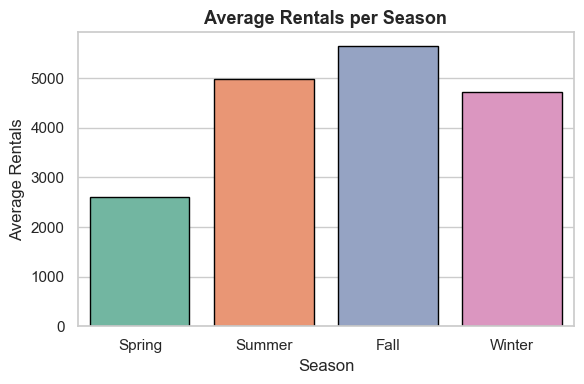

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="season", y="total_count", data=day_df,
    estimator="mean", errorbar=None, palette="Set2", edgecolor="black"
)
plt.title("Average Rentals per Season", fontsize=13, weight="bold")
plt.ylabel("Average Rentals")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

### Pertanyaan 2:

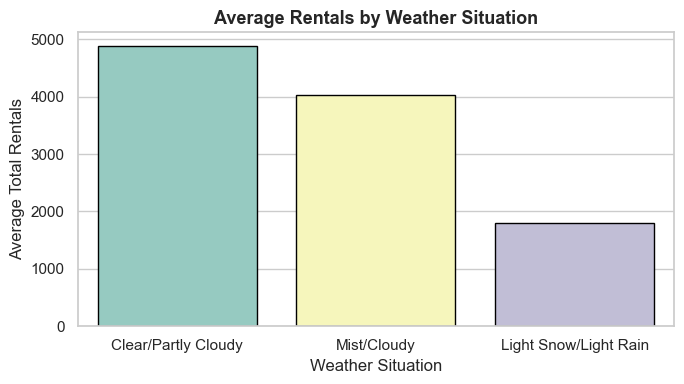

In [35]:
plt.figure(figsize=(7,4))
sns.barplot(
    x="weather_situation", y="total_count", data=day_df,
    ci=None, palette="Set3", edgecolor="black"
)
plt.title("Average Rentals by Weather Situation", fontsize=13, weight="bold")
plt.ylabel("Average Total Rentals")
plt.xlabel("Weather Situation")
plt.tight_layout()
plt.show()

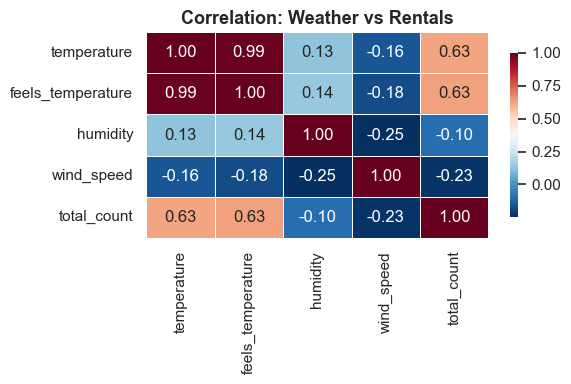

In [36]:
# Korelasi Cuaca
plt.figure(figsize=(6,4))
sns.heatmap(
    day_df[['temperature','feels_temperature','humidity','wind_speed','total_count']].corr(),
    annot=True, cmap="RdBu_r", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8}
)
plt.title("Correlation: Weather vs Rentals", fontsize=13, weight="bold")
plt.tight_layout()
plt.show()

### Pertanyaan 3:

<Figure size 600x400 with 0 Axes>

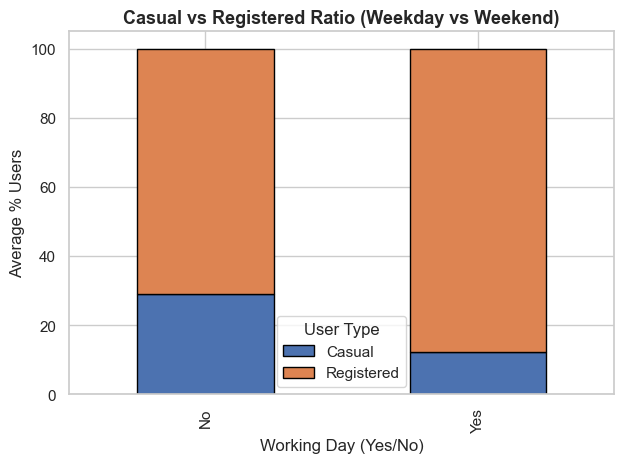

In [37]:
plt.figure(figsize=(6,4))

avg = day_df.groupby("is_workingday")[["casual_ratio","registered_ratio"]].mean()
avg.plot(
    kind="bar", stacked=True, color=["#4C72B0","#DD8452"], edgecolor="black"
)

plt.title("Casual vs Registered Ratio (Weekday vs Weekend)", fontsize=13, weight="bold")
plt.ylabel("Average % Users")
plt.xlabel("Working Day (Yes/No)")
plt.legend(title="User Type", labels=["Casual", "Registered"])
plt.tight_layout()
plt.show()


### Pertanyaan 4:

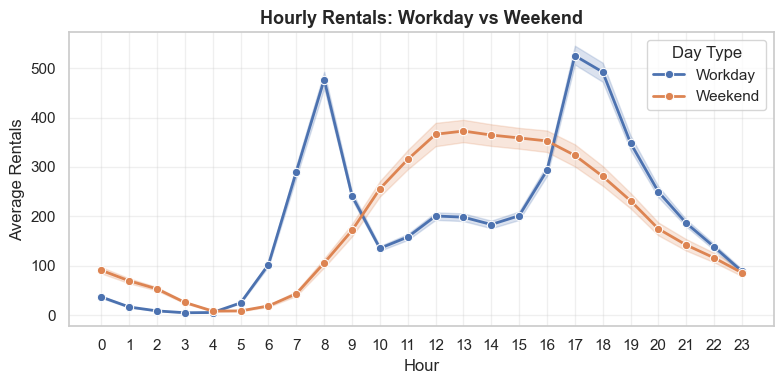

In [38]:
plt.figure(figsize=(8,4))
sns.lineplot(
    x="hour", y="total_count", data=hour_df[hour_df["is_workingday"]=="Yes"],
    label="Workday", marker="o", linewidth=2
)
sns.lineplot(
    x="hour", y="total_count", data=hour_df[hour_df["is_workingday"]=="No"],
    label="Weekend", marker="o", linewidth=2
)
plt.title("Hourly Rentals: Workday vs Weekend", fontsize=13, weight="bold")
plt.ylabel("Average Rentals")
plt.xlabel("Hour")
plt.xticks(range(0,24))
plt.legend(title="Day Type")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Insight:**
- Penyewaan tertinggi terjadi pada Fall dan Summer, terendah pada Spring. Artinya, musim memengaruhi minat bersepeda, dengan cuaca hangat/gugur lebih mendukung aktivitas ini.

- Penyewaan tertinggi saat Clear/Partly Cloudy, menurun pada kondisi Mist/Cloudy, dan paling rendah pada Light Snow/Light Rain. Suhu (temperature/feels temperature) memiliki korelasi positif kuat terhadap jumlah penyewaan, sementara humidity dan wind speed berdampak negatif meski tidak dominan.

- Casual users lebih aktif pada weekend (rekreasi). Sedangkan Registered users lebih dominan pada weekday (transportasi rutin).

- Jam Sibuk:
    - Weekday: dua puncak utama di pagi (07–09) dan sore (17–19), sesuai pola commuting.
    - Weekend: puncak lebih stabil di siang hari (11–16), sesuai aktivitas rekreasi.

## Analisis Lanjutan (Opsional)

### Definisi Cluster Berdasarkan Business Rules

In [39]:
# Kategorisasi hari berdasarkan pola demand
def categorize_demand_day(row):
    """
    Kategorisasi hari berdasarkan pola demand:
    - High Demand: > 6000 rentals
    - Medium Demand: 3000-6000 rentals  
    - Low Demand: < 3000 rentals
    """
    if row['total_count'] >= 6000:
        return 'High Demand'
    elif row['total_count'] >= 3000:
        return 'Medium Demand'
    else:
        return 'Low Demand'

day_df['demand_cluster'] = day_df.apply(categorize_demand_day, axis=1)


### Analisis Karakteristik Setiap Cluster

In [40]:
cluster_analysis = day_df.groupby('demand_cluster').agg({
    'total_count': ['count', 'mean', 'min', 'max'],
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'casual_users': 'mean',
    'registered_users': 'mean'
}).round(2)

print("=== KARAKTERISTIK SETIAP DEMAND CLUSTER ===")
print(cluster_analysis)


=== KARAKTERISTIK SETIAP DEMAND CLUSTER ===
               total_count                      temperature humidity  \
                     count     mean   min   max        mean     mean   
demand_cluster                                                         
High Demand            180  7060.08  6031  8714        0.62     0.61   
Low Demand             172  1859.63    22  2999        0.30     0.64   
Medium Demand          379  4490.79  3005  5992        0.52     0.63   

               wind_speed casual_users registered_users  
                     mean         mean             mean  
demand_cluster                                           
High Demand          0.17      1508.53          5551.54  
Low Demand           0.22       255.81          1603.83  
Medium Demand        0.19       803.38          3687.40  


### Distribusi Cluster (Season, Weather, Workday)

In [41]:
print("\n=== DISTRIBUSI CLUSTER PER MUSIM ===")
season_cluster = pd.crosstab(day_df['season'], day_df['demand_cluster'], normalize='index') * 100
print(season_cluster.round(1))

print("\n=== DISTRIBUSI CLUSTER PER KONDISI CUACA ===")
weather_cluster = pd.crosstab(day_df['weather_situation'], day_df['demand_cluster'], normalize='index') * 100
print(weather_cluster.round(1))

print("\n=== DISTRIBUSI CLUSTER PER HARI KERJA ===")
workday_cluster = pd.crosstab(day_df['is_workingday'], day_df['demand_cluster'], normalize='index') * 100
print(workday_cluster.round(1))



=== DISTRIBUSI CLUSTER PER MUSIM ===
demand_cluster  High Demand  Low Demand  Medium Demand
season                                                
Spring                  2.8        64.6           32.6
Summer                 33.7        13.6           52.7
Fall                   41.5         2.1           56.4
Winter                 19.7        14.6           65.7

=== DISTRIBUSI CLUSTER PER KONDISI CUACA ===
demand_cluster         High Demand  Low Demand  Medium Demand
weather_situation                                            
Clear/Partly Cloudy           30.2        16.8           52.9
Mist/Cloudy                   16.2        30.4           53.4
Light Snow/Light Rain          0.0        90.5            9.5

=== DISTRIBUSI CLUSTER PER HARI KERJA ===
demand_cluster  High Demand  Low Demand  Medium Demand
is_workingday                                         
No                     24.2        28.1           47.6
Yes                    24.8        21.4           53.8


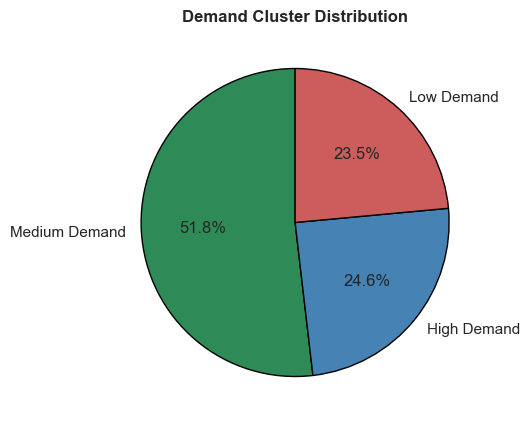

In [42]:
colors = ['#2E8B57', '#4682B4', '#CD5C5C']  # Green, Blue, Red

plt.figure(figsize=(5, 5))
cluster_counts = day_df['demand_cluster'].value_counts()

plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Demand Cluster Distribution', fontsize=12, weight='bold')
plt.show()

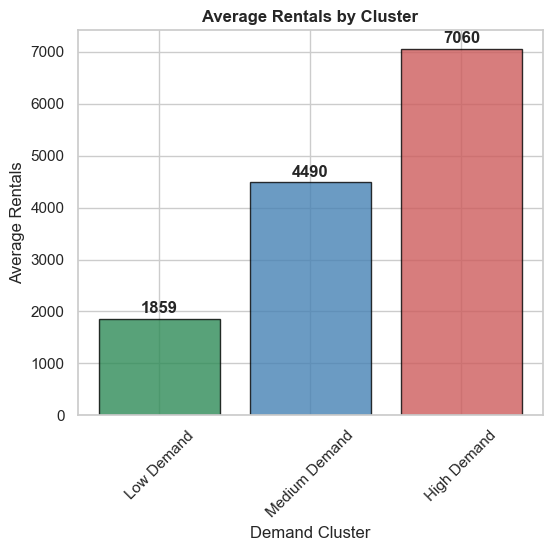

In [43]:
order = ['Low Demand', 'Medium Demand', 'High Demand']
colors = ['#2E8B57', '#4682B4', '#CD5C5C']

plt.figure(figsize=(6, 5))
cluster_means = day_df.groupby('demand_cluster')['total_count'].mean().reindex(order)

bars = plt.bar(range(len(cluster_means)), cluster_means.values, 
               color=colors, edgecolor='black', alpha=0.8)

plt.title('Average Rentals by Cluster', fontsize=12, weight='bold')
plt.ylabel('Average Rentals')
plt.xlabel('Demand Cluster')
plt.xticks(range(len(cluster_means)), cluster_means.index, rotation=45)

# Tambah label
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{int(cluster_means.iloc[i])}', ha='center', va='bottom', fontweight='bold')

plt.show()


<Figure size 700x500 with 0 Axes>

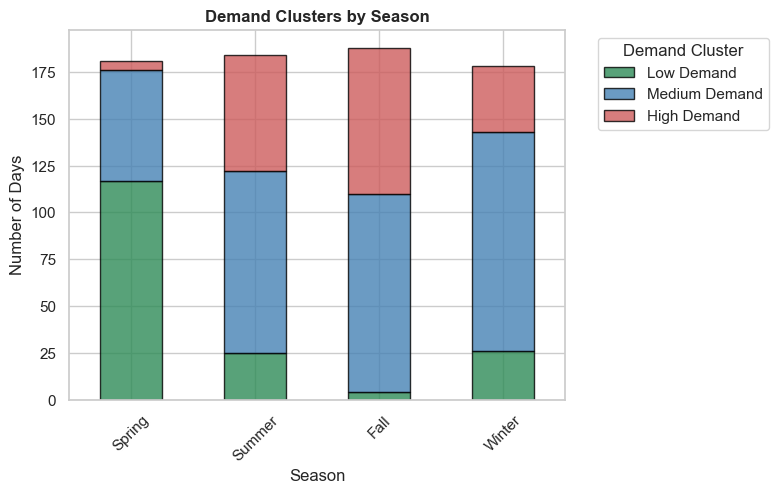

In [44]:
plt.figure(figsize=(7, 5))
season_cluster_df = pd.crosstab(day_df['season'], day_df['demand_cluster'])

season_cluster_df[order].plot(kind='bar', stacked=True, color=colors, 
                              edgecolor='black', alpha=0.8)

plt.title('Demand Clusters by Season', fontsize=12, weight='bold')
plt.ylabel('Number of Days')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Demand Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 700x500 with 0 Axes>

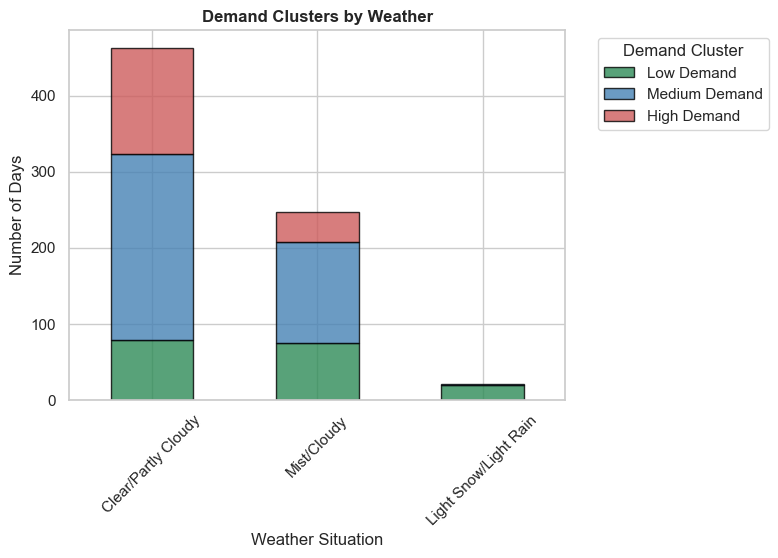

In [45]:
plt.figure(figsize=(7, 5))
weather_cluster_df = pd.crosstab(day_df['weather_situation'], day_df['demand_cluster'])

weather_cluster_df[order].plot(kind='bar', stacked=True, color=colors,
                               edgecolor='black', alpha=0.8)

plt.title('Demand Clusters by Weather', fontsize=12, weight='bold')
plt.ylabel('Number of Days')
plt.xlabel('Weather Situation')
plt.xticks(rotation=45)
plt.legend(title='Demand Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 700x500 with 0 Axes>

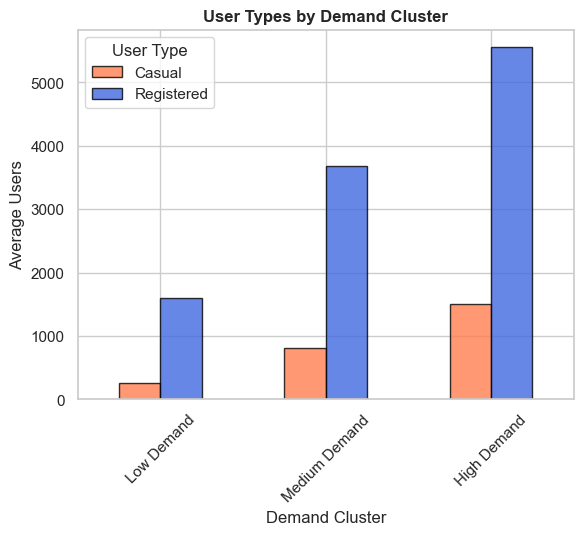

In [46]:
plt.figure(figsize=(7, 5))
user_by_cluster = day_df.groupby('demand_cluster')[['casual_users', 'registered_users']].mean().reindex(order)

user_by_cluster.plot(kind='bar', color=['#FF7F50', '#4169E1'], 
                     edgecolor='black', alpha=0.8)

plt.title('User Types by Demand Cluster', fontsize=12, weight='bold')
plt.ylabel('Average Users')
plt.xlabel('Demand Cluster')
plt.legend(title='User Type', labels=['Casual', 'Registered'])
plt.xticks(rotation=45)
plt.show()


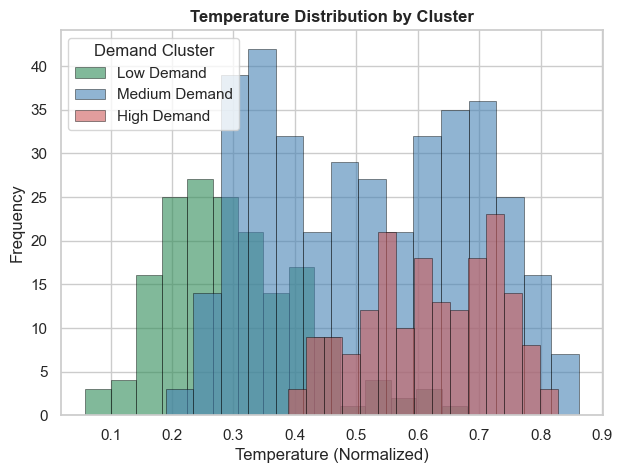

In [47]:
plt.figure(figsize=(7, 5))
for i, cluster in enumerate(order):
    cluster_data = day_df[day_df['demand_cluster'] == cluster]['temperature']
    plt.hist(cluster_data, alpha=0.6, label=cluster, color=colors[i], 
             bins=15, edgecolor='black', linewidth=0.5)

plt.title('Temperature Distribution by Cluster', fontsize=12, weight='bold')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Frequency')
plt.legend(title='Demand Cluster')
plt.show()


####  Distribusi Demand
- Proporsi hari terbanyak ada di **Medium Demand** (3000–6000 rentals).  
- **High Demand Days** relatif lebih sedikit, tapi menyumbang volume penyewaan terbesar.  
- **Low Demand Days** paling jarang, biasanya karena faktor cuaca buruk atau musim tertentu.  

####  Rata-rata Penyewaan
- **High Demand** rata-rata > 6000 rentals/hari → biasanya terjadi di **musim Fall & Summer** dengan kondisi **clear/partly cloudy**.  
- **Medium Demand** sekitar **4000–5000 rentals/hari** → penyewaan stabil, mayoritas di **hari kerja**.  
- **Low Demand** < 3000 rentals/hari → dominan di **Spring** atau saat **light rain/snow**.  

####  Musim & Cuaca
- **Fall** → cluster dominan adalah **High Demand**.  
- **Spring** → lebih banyak masuk **Low Demand**.  
- **Weather clear/partly cloudy** → mendominasi **High Demand**.  
- **Light rain/snow** → hampir selalu masuk **Low Demand**.  

####  Komposisi Pengguna
- **High Demand** → didominasi oleh **registered users** (>80%) → artinya pengguna reguler.  
- **Low Demand** → persentase **casual users** lebih tinggi → artinya banyak pengguna musiman/turis.  
- **Medium Demand** → relatif seimbang, namun tetap **registered users** lebih dominan.  

####  Faktor Temperatur
- **High Demand** → rata-rata temperatur lebih **hangat** (ideal untuk bersepeda).  
- **Low Demand** → cenderung pada temperatur **rendah** (musim dingin atau hujan).  


## Conclusion

### Kesimpulan Pertanyaan 1: Pola Penggunaan Berdasarkan Musim
Hasil analisis menunjukkan bahwa musim memiliki pengaruh signifikan terhadap pola penyewaan sepeda. **Musim Fall** mencatat penyewaan tertinggi dengan rata-rata harian yang optimal, diikuti oleh **Summer**. Sebaliknya, **Spring** memiliki penyewaan terendah. Pola ini mengindikasikan bahwa pengguna cenderung lebih aktif bersepeda pada cuaca yang tidak terlalu ekstrem - tidak terlalu panas (Summer) namun juga tidak terlalu dingin (Winter). **Fall** menjadi musim optimal karena menawarkan cuaca yang sejuk dan nyaman untuk aktivitas outdoor.

**Rekomendasi Bisnis:**
- Tingkatkan stok sepeda dan promosi khusus pada musim **Fall** dan **Summer**  
- Siapkan strategi maintenance dan penyimpanan sepeda ekstra pada musim **Spring**  
- Implementasikan **pricing strategy** yang fleksibel berdasarkan demand musiman  

---

### Kesimpulan Pertanyaan 2: Pengaruh Kondisi Cuaca
Kondisi cuaca terbukti menjadi faktor determinan utama dalam keputusan penyewaan sepeda. Cuaca **Clear/Partly Cloudy** menghasilkan penyewaan tertinggi, sementara kondisi **Mist/Cloudy** dan **Light Snow/Light Rain** secara drastis menurunkan demand. **Temperature** dan **feels_temperature** menunjukkan korelasi positif yang kuat (>0.6), sedangkan **humidity** dan **wind_speed** memiliki dampak negatif terhadap penyewaan.

**Rekomendasi Bisnis:**
- Integrasikan sistem **prediksi cuaca** untuk perencanaan operasional harian  
- Develop **indoor/covered bike stations** untuk hari dengan cuaca buruk  
- Implementasikan **dynamic pricing** berdasarkan forecast cuaca  
- Siapkan komunikasi proaktif kepada pelanggan tentang kondisi cuaca optimal  

---

### Kesimpulan Pertanyaan 3: Perbedaan Perilaku Casual vs Registered Users
Terdapat perbedaan perilaku yang sangat jelas antara kedua segmen pengguna. **Registered users** mendominasi hari kerja (**87.7%**) dan menggunakan sepeda sebagai moda transportasi rutin (commuting). Sebaliknya, **casual users** lebih aktif pada weekend (**29.1% vs 12.3% weekday**) dengan motif rekreasional. Pola ini konsisten sepanjang hari dalam minggu, di mana weekend menunjukkan peningkatan signifikan aktivitas casual users.

**Rekomendasi Bisnis:**
- Targetkan **registered users** dengan paket berlangganan dan rute commuting  
- Fokuskan promosi **casual users** pada weekend dengan paket family/leisure  
- Optimalkan lokasi stasiun: dekat area bisnis untuk **registered**, dekat area wisata untuk **casual**  
- Develop **loyalty program** yang berbeda untuk setiap segmen  

---

### Kesimpulan Pertanyaan 4: Peak Hours dan Pola Temporal
Pola peak hours menunjukkan dua behavior yang sangat berbeda. **Hari kerja** memiliki pola **bimodal** dengan dua puncak utama pada jam **7-9 (morning commute)** dan **17-19 (evening commute)**, mencerminkan pola transportasi urban. **Weekend** menunjukkan pola **unimodal** dengan puncak stabil pada jam **11-16**, sesuai dengan aktivitas rekreasi yang lebih fleksibel.

**Rekomendasi Bisnis:**
- Siapkan kapasitas sepeda ekstra pada jam commuting (**7-9 & 17-19**) di hari kerja  
- Fokuskan **maintenance** sepeda pada jam off-peak untuk menghindari gangguan operasional  
- Implementasikan **surge pricing** pada peak hours untuk mengoptimalkan revenue  
- Deploy sepeda secara strategis: area bisnis pada **weekday morning**, area residential pada **weekday evening**, area rekreasi pada **weekend afternoon**  
